In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch, correlate
import tensorflow as tf

# Load your trained generator
generator = tf.keras.models.load_model("saved_models/qpo_cgan_phy_generator.keras")
latent_dim = 100

# Function to simulate a light curve from GAN
def generate_light_curve(fc, amp, is_qpo=1.0):
    z = tf.random.normal((1, latent_dim))
    label = tf.convert_to_tensor([[fc, amp, is_qpo]], dtype=tf.float32)
    light_curve = generator([z, label], training=False).numpy().squeeze()
    return light_curve


In [2]:
def plot_light_curve_analysis(signal, title, fs=1.0):
    fig, axs = plt.subplots(1, 3, figsize=(15, 3))

    # Time series
    axs[0].plot(signal)
    axs[0].set_title(f"{title} - Time Series")
    axs[0].set_xlabel("Time")
    axs[0].set_ylabel("Flux")

    # PSD
    f, Pxx = welch(signal, fs=fs, nperseg=256)
    axs[1].semilogy(f, Pxx)
    axs[1].set_title("Power Spectrum")
    axs[1].set_xlabel("Frequency (Hz)")
    axs[1].set_ylabel("Power")

    # ACF
    acf = correlate(signal - np.mean(signal), signal - np.mean(signal), mode='full')
    acf = acf[acf.size // 2:]
    acf /= acf[0]
    axs[2].plot(acf[:200])
    axs[2].set_title("Autocorrelation")
    axs[2].set_xlabel("Lag")

    plt.tight_layout()
    plt.show()


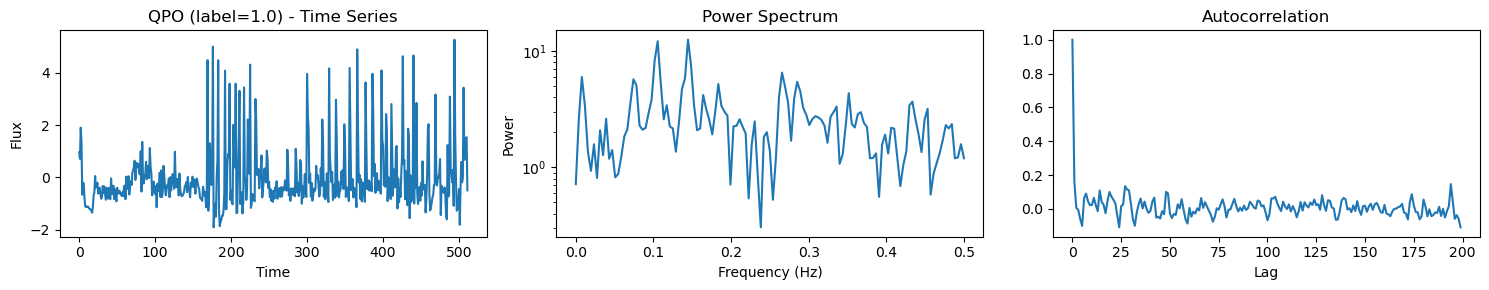

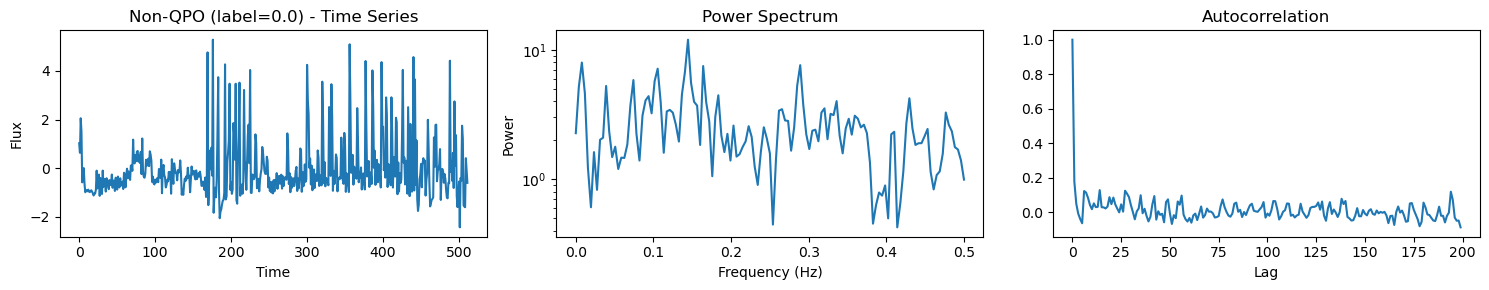

In [3]:
# Choose test parameters
fc = 0.5
amp = 0.7

# Generate QPO signal
signal_qpo = generate_light_curve(fc, amp, is_qpo=1.0)
plot_light_curve_analysis(signal_qpo, "QPO (label=1.0)")

# Generate non-QPO signal
signal_noqpo = generate_light_curve(fc, amp, is_qpo=0.0)
plot_light_curve_analysis(signal_noqpo, "Non-QPO (label=0.0)")
